In [1]:
%matplotlib inline

# CLASSIFICATION

In [2]:
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib

## K nearest neighbours

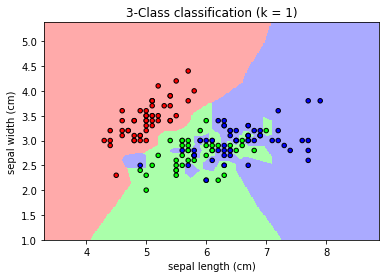

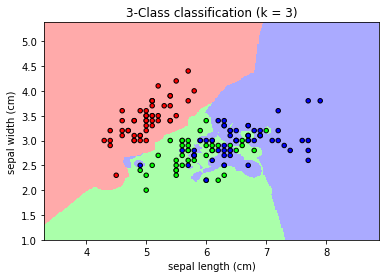

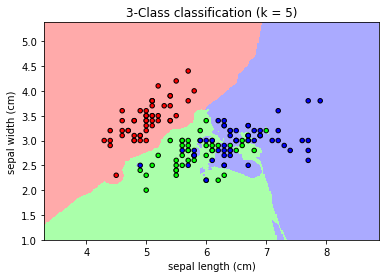

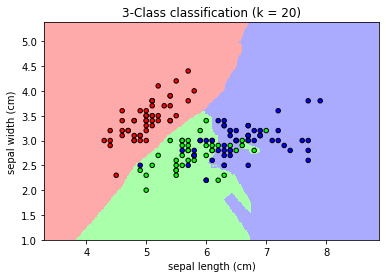

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
cols = iris['feature_names'][:2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold =  ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for n_neighbors in [1,3,5,20]:
    # we create an instance of kNN classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"% (n_neighbors))

    plt.show()

#### EXERCISE 1
- Repeat the procedure, using one sepal and one petal variable.
- The step size employed was $h = 0.02$. How many points were used in the given example? And in the one you have done?
- Now repeat the process using PCA data compression with 2 PCs. Would you adjust $h$? would you use the same step size for both PCs? If necessary, make the adjustments you consider more adequate.


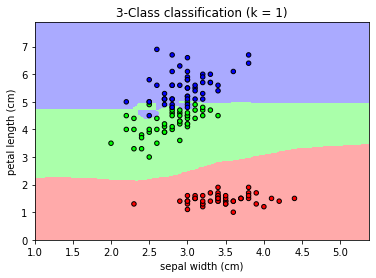

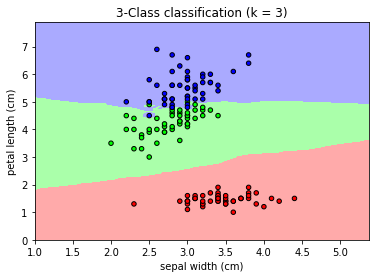

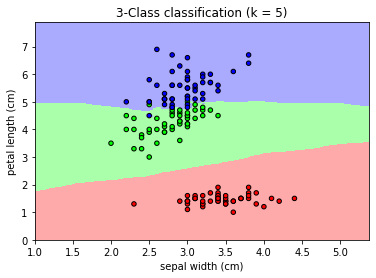

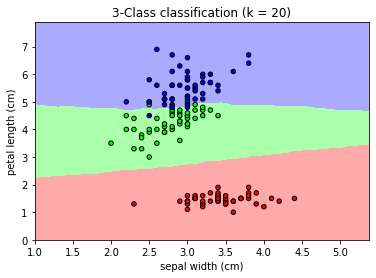

In [4]:
 # Your solution here
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, 1:3]
cols = iris['feature_names'][1:3]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold =  ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for n_neighbors in [1,3,5,20]:
    # we create an instance of kNN classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"% (n_neighbors))

    plt.show()

In [5]:
# Your solution here

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
points = ((x_max - x_min)/h) * ((y_max - y_min)/h)
points

86900.0

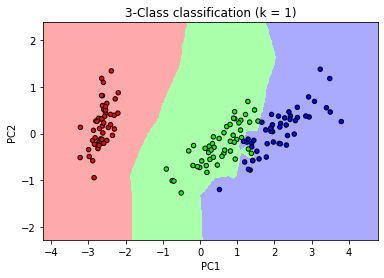

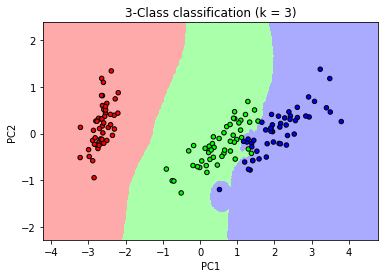

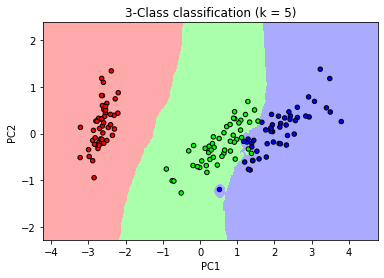

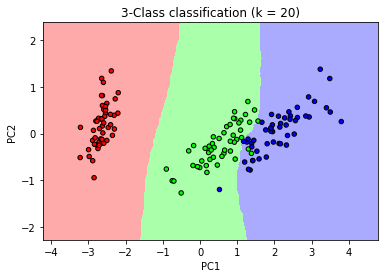

In [6]:
# Your solution here
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
cols = ['PC1', 'PC2']
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold =  ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for n_neighbors in [1,3,5,20]:
    # we create an instance of kNN classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"% (n_neighbors))

    plt.show()

In [7]:
# Your solution here

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
points = ((x_max - x_min)/h) * ((y_max - y_min)/h)
points

104628.68319077497

#### Answers to the questions:

It is ok the value of h because the separation is narrower.

## Decision trees

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
print("The first 5 instances\n",iris.data[:5])
print("The first 5 class variables\n",iris.target[:5])
print("The values of the feature variables\n",iris.feature_names)

The first 5 instances
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
The first 5 class variables
 [0 0 0 0 0]
The values of the feature variables
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


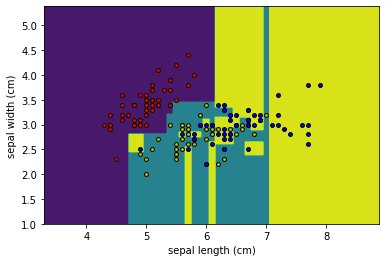

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"

# Adjustable parameters
plot_step = 0.02
pair = [0,1]

# We only take the two corresponding features
iris = load_iris()
X = iris.data[:, pair]
y = iris.target

# Train
clf = DecisionTreeClassifier(max_depth=10000).fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cs = plt.contourf(xx, yy, Z)

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], edgecolor='black', s=15)
plt.show()

#### EXERCISE 2
- Looking at the provided plot, would you say that the model overfits? If so, why do you think it happens?

(Hint: See the info here https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

- If you think that a better decision tree model could be created, do it in the same way as before. Compare both plots and justify why this new model is better.

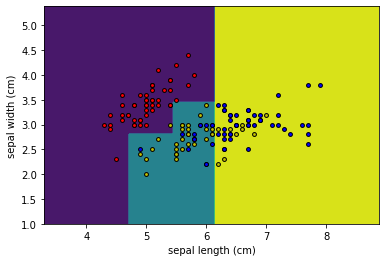

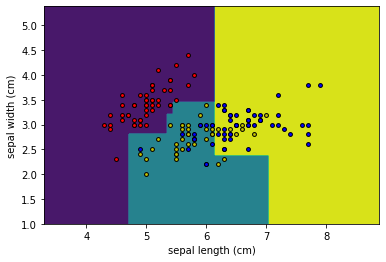

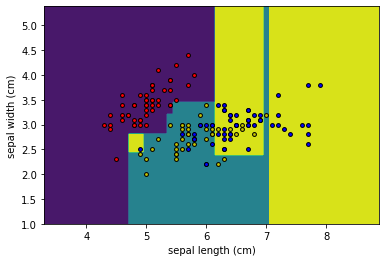

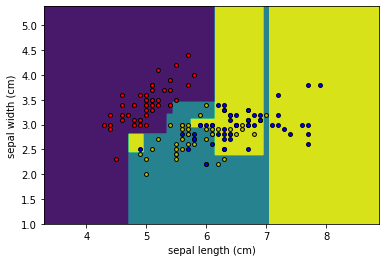

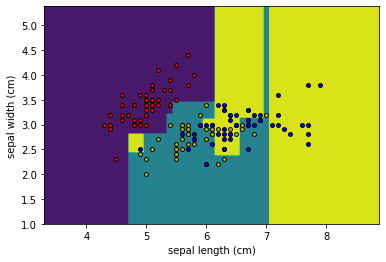

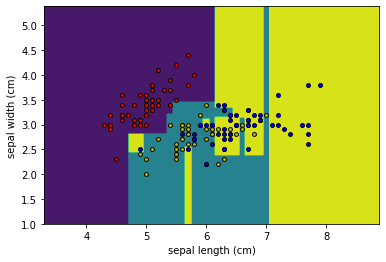

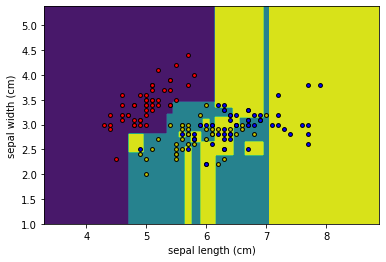

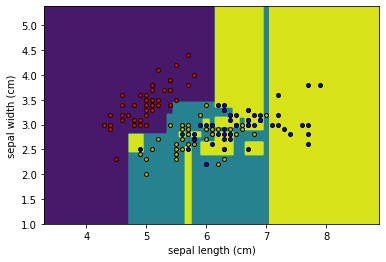

In [10]:
# Your solution here
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"

# Adjustable parameters
plot_step = 0.02
pair = [0,1]

# We only take the two corresponding features
iris = load_iris()
X = iris.data[:, pair]
y = iris.target

# Train
for max_depth in [3, 4, 5, 6, 7, 8, 9, 10]:
    clf = DecisionTreeClassifier(max_depth=max_depth).fit(X, y)

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], edgecolor='black', s=15)
    plt.show()


#### Comments:

* The first model overfits because the depth of the tree is too high.

* With max_depth equal to 3 or 4 it is enough to have good separation without extrange small boxes containing only one or two points.

## Random Forests

### Feature importances

In [11]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X_train = iris["data"]
y_train = iris["target"]
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=None, random_state=0)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [12]:
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09488330072351854
sepal width (cm) 0.0231244361586528
petal length (cm) 0.4409499796986607
petal width (cm) 0.441042283419168


In [13]:
rnd_clf.feature_importances_

array([0.0948833 , 0.02312444, 0.44094998, 0.44104228])

#### Question 1:
Is the random seed relevant for the order in the ranking of features acording to feature_importances? And for the cuantification of the relative importances between the features?

In [14]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X_train = iris["data"]
y_train = iris["target"]
for seed in list(range(0, 10)):
    rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=None, random_state=seed)
    rnd_clf.fit(X_train, y_train)
    print(rnd_clf.feature_importances_)

[0.0948833  0.02312444 0.44094998 0.44104228]
[0.09503425 0.02072811 0.4298349  0.45440274]
[0.1016709  0.02354043 0.42437887 0.4504098 ]
[0.10558475 0.02498237 0.40760971 0.46182316]
[0.10659129 0.02495746 0.42655524 0.44189602]
[0.10297395 0.02554585 0.43690099 0.43457922]
[0.10520509 0.02471458 0.42067727 0.44940307]
[0.10509658 0.02486551 0.44841485 0.42162307]
[0.1001875  0.02253685 0.43483444 0.44244121]
[0.09780422 0.0247979  0.43692065 0.44047722]


#### Answer:
They are similar in behavior.

#### Note:
If we use feature importances (or any other approach that studies the variables isolated one by one) to select the best subset of 2 variables, we would have taken both petal variables. Nevertheless, we know from previous notebooks (where we checked all 6 possible combinations by brute force) that the best pair contains one sepal variable and one petal variable. The reason for this (apparently) strange behavior is that feature importances studies each variable separately, but ignores the posible informative effect of the combination of several variables.

An example for that are three students, two of them studing the same book (one of them 95% of the book and the other one 98%). The third student uses another book, of lower quality but with different approaches and another particular vision. The combined knowledge of one of the first two and the third would be higher than the combined of the first two.

In [15]:
# Auxiliar function for plotting decision boundaries
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.0, 1.0, -1.0, 1.0], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

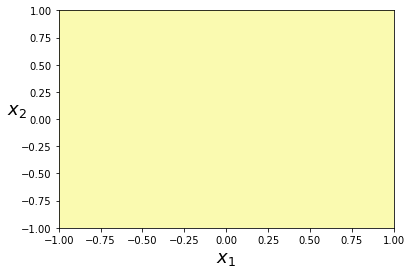

In [16]:
plt.figure(figsize=(6, 4))
for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(tree_clf, X, y, alpha=0.02, contour=False)

plt.show()

#### Question 2:
- How do you interpret the fact that nothing is visible? Which type of problem happened? Correct it.
- Once corrected, how do you interpret the fuzziness you are seeing?

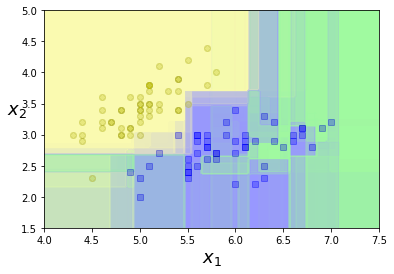

In [17]:
# Your answer here
plt.figure(figsize=(6, 4))
for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(tree_clf, X, y, axes=[4, 7.5, 1.5, 5], alpha=0.02, contour=False)
plt.show()

#### Answer:
- There is a problem with the scale of the variables.
- Using different seeds the zones fluctuate a bit. That is the reason for the fuzziness.

Here you have a scoring function where you can specify the classifier and score you want to employ

In [18]:
# Auxiliar scoring function
def automatic_scoring(df, clf=DecisionTreeClassifier(), score='f1_macro'):
    from sklearn.model_selection import cross_val_score
    if clf == DecisionTreeClassifier:
        from sklearn.tree import DecisionTreeClassifier
    scorer = cross_val_score(estimator=clf, X=df.values[:, :-1], y=df.values[:, -1], cv=5, scoring=score)
    summary_score = scorer.mean()
    return summary_score


## Logistic regression

z:\programacion\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


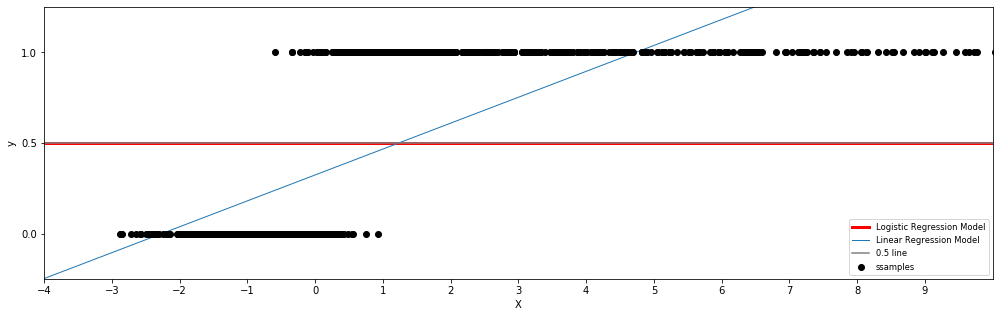

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 1000
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(C=1e-10)
clf.fit(X, y)

# and plot the result
plt.figure(figsize=(17, 5))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model','0.5 line','ssamples'), loc="lower right", fontsize='small')
plt.show()

## Naive Bayes

In [20]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"
      % (iris.data.shape[0],(iris.target != y_pred).sum()))

Number of mislabeled points out of a total 150 points : 6


## Support vector Machines

### Iris dataset

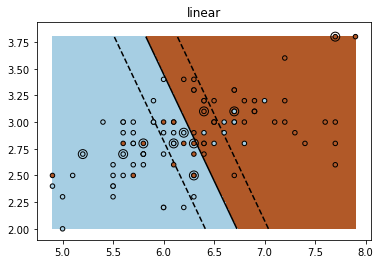

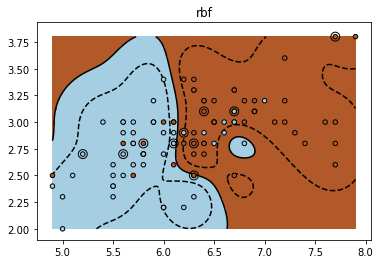

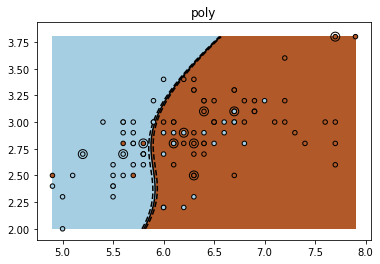

In [21]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Use only 2 classes and 2 variables
X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for fig_num, kernel in enumerate(['linear','rbf','poly']):
    clf = svm.SVC(kernel=kernel, gamma=10, degree=3)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

#### Exercise 3:
- Play with the rbf kernel parameters and check how the shapes of the classification change when using the same classes as the example and the second and forth variables.
- Do the same for another pair of classes.
- Comment the differences you see in both cases.

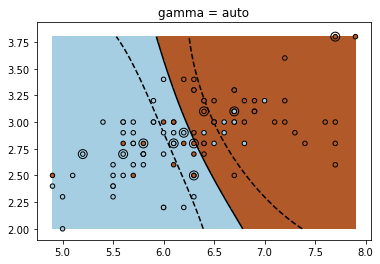

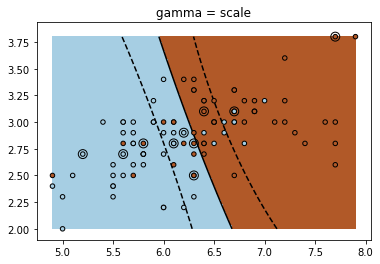

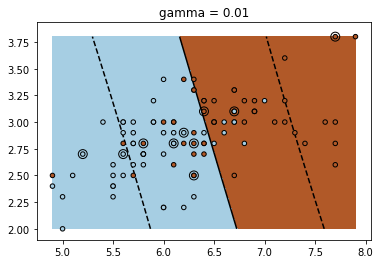

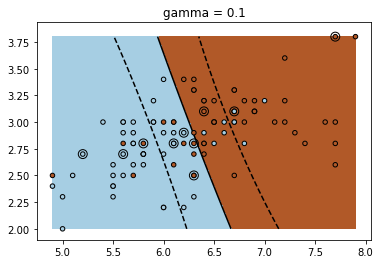

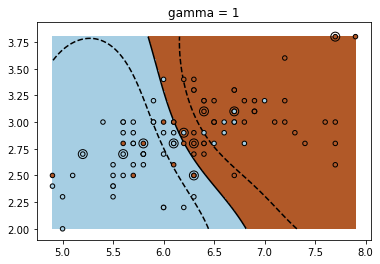

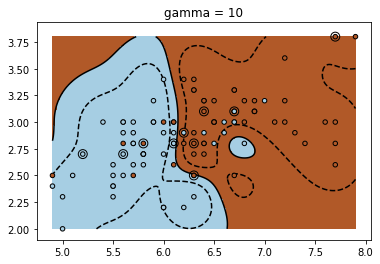

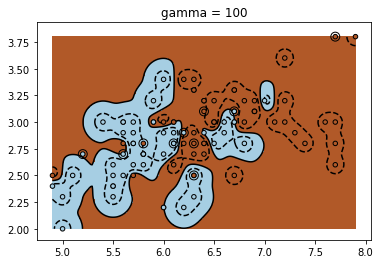

In [22]:
#Your solution here (include commented answer to the third point)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Use only 2 classes and 2 variables
X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for fig_num, gamma in enumerate(['auto','scale', 0.01, 0.1, 1, 10, 100]):
    clf = svm.SVC(kernel='rbf', gamma=gamma)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title('gamma = ' + str(gamma))
plt.show()

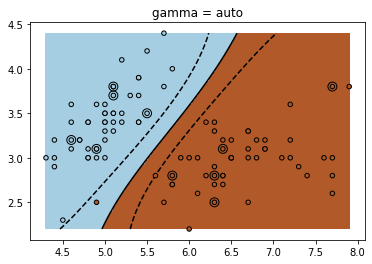

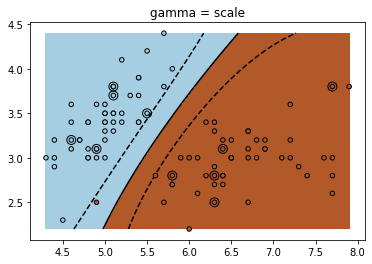

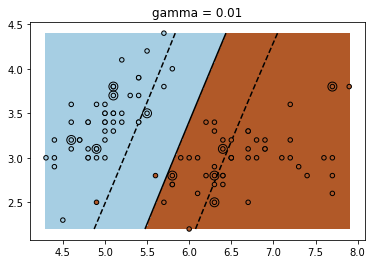

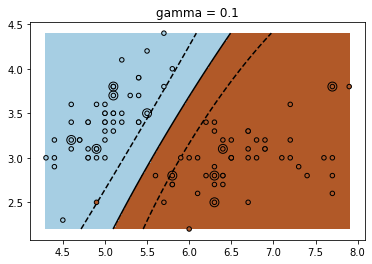

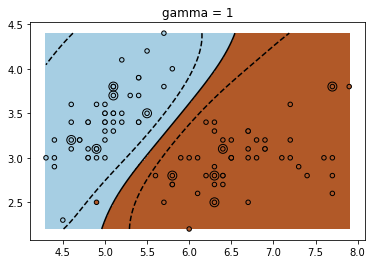

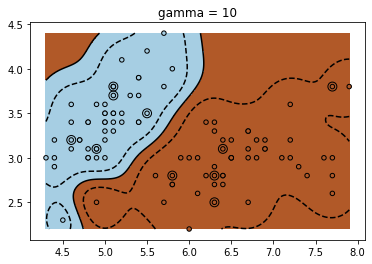

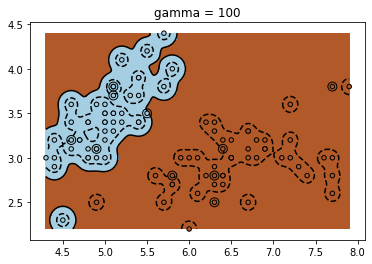

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Use only 2 classes and 2 variables
X = X[y != 1, :2]
y = y[y != 1]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for fig_num, gamma in enumerate(['auto','scale', 0.01, 0.1, 1, 10, 100]):
    clf = svm.SVC(kernel='rbf', gamma=gamma)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title('gamma = ' + str(gamma))
plt.show()

#### Comments:
In the second case, the accuracy is much higher (almost perfect). Moreover, also in the second case, the shapes with higher gamma (i.e. more flexibility to fit better to training data) are not so dispersed (only two almost convex blue bubbles).

The reason for it is that this second problem is much easier than the first. We should be able to realize it, because in the second problem one of the classes we have to classify is Setosa, but in the first we classify Virginica and Versicolor. 

### Digits dataset

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97     

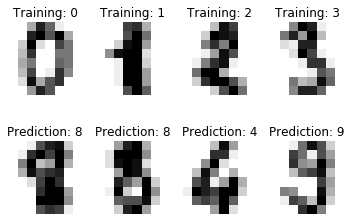

In [24]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

#### Exercise 4:
- Try all One-vs-All strategies, and calculate an estimation of the F1 score. Use f1_macro.
- Try all One-vs-One strategies, and calculate an estimation of the AUC score. Use roc_auc_score.

In [25]:
# Your solution here
from sklearn.metrics import f1_score


digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
n_classes = len(np.unique(digits.target))

classifier = svm.SVC(gamma=0.001)

xtr = data[:n_samples // 2]
ytr = digits.target[:n_samples // 2]
xte = data[n_samples // 2:]
yte = digits.target[n_samples // 2:]

f1 = 0

for x in list(range(10)):
    ytr_aux = ytr.copy()
    for y in list(range(len(ytr_aux))):
        if ytr_aux[y] != x:
            ytr_aux[y] = -1
        else:
            ytr_aux[y] = 1
    classifier.fit(xtr, ytr_aux)
    expected = yte.copy()
    for y in list(range(len(expected))):
        if expected[y] != x:
            expected[y] = -1
        else:
            expected[y] = 1
    predicted = classifier.predict(xte)
    f1_partial = f1_score(expected, predicted, average='macro')
    # cummulative average
    f1 = ((x*f1) + f1_partial)/(x+1)
f1

0.9701740785392742

In [26]:
# Your solution here
from sklearn.metrics import roc_auc_score


digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
n_classes = len(np.unique(digits.target))

classifier = svm.SVC(gamma=0.001)

xtr = data[:n_samples // 2]
ytr = digits.target[:n_samples // 2]
xte = data[n_samples // 2:]
yte = digits.target[n_samples // 2:]

auc = 0

for x1 in list(range(9)):
    for x2 in list(range(x1, 10)):
        indices = [False] * len(ytr)
        for y in ytr:
            if ytr[y] in [x1, x2]:
                indices[y] = True              
        xtr_sub = xtr.copy()[indices, :]
        ytr_sub = ytr.copy()[indices]
        classifier.fit(xtr, ytr_aux)
        expected = yte.copy()
        for y in list(range(len(expected))):
            if expected[y] != x:
                expected[y] = -1
            else:
                expected[y] = 1
        predicted = classifier.predict(xte)
        auc_partial = roc_auc_score(expected, predicted)
        # cummulative average
        auc = ((x*f1) + f1_partial)/(x+1)
auc

0.9693389366951989

## Neural Networks

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# mlp = MLPClassifier(hidden_layer_sizes=(100, 100,), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Automatically created module for IPython interactive environment


MemoryError: Unable to allocate array with shape (784, 70000) and data type float64